##**Chapter 6 - [Decision Trees](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb)** 

Son muy versátiles y fáciles de interpretar la manera en que toman sus decisiones (Incluso podemos graficar el proceso de clasificación).

### **[Problemas de Clasificación](https://scikit-learn.org/stable/modules/tree.html#classification)**

Tal como una regresión logistica o un SVM, pero con la felxibilidad de los arboles de decisión

In [0]:
#Librerías Comunes o No específicas al problema en cuestión
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Reproducible
np.random.seed(42)

In [83]:
#Importamos datos, separamos el target de los atributos, entrenamos al modelo
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X=iris.data[:,2:]
y=iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
#Vemos en que manera están nombrados cada una de las clasificaciones
tree_clf.classes_
#0-->Iris-Setosa
#1-->Iris-Versicolor
#2-->Iris-Virginica

array([0, 1, 2])

####**Explicando un arbol de Decisión**

A continuación se presenta un gráfico que nos entrega la idea de como el algoritmo toma sus decisiones. A los arboles de decisión los podemos llamar "white box models" ya que la forma en que toman las decisiones de clasificación no son un enigma, son facilmente interpretables. 

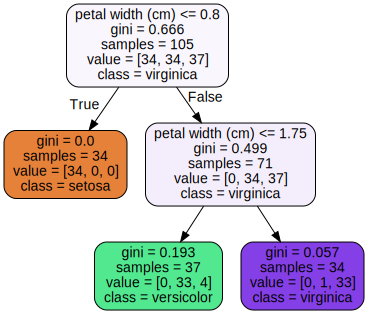

In [81]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join("iris_tree.dot"))

####**Gráfico que separa clases**

Ahora con un gráfico de despersión separaremos las clases, la lineas que cruzan el gráfico son hechas a partir de los valores del arbol de decisión anterior.

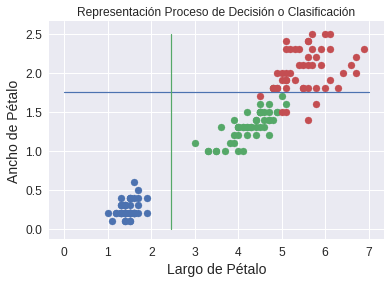

In [82]:
plt.scatter(X[:, 0][y==0],X[:, 1][y==0], label="Iris Setosa")
plt.scatter(X[:,0][y==1], X[:, 1][y==1], label="Iris Versicolor")
plt.scatter(X[:,0][y==2], X[:, 1][y==2], label="Iris Virginica")
plt.xlabel("Largo de Pétalo")
plt.ylabel("Ancho de Pétalo")
plt.title("Representación Proceso de Decisión o Clasificación")
plt.plot([0, 7],[1.75, 1.75], lw=1.2) #En base a proceso anterior, segunda capa
plt.plot([2.45,2.45], [0, 2.5], lw=1.2) #En base a proceso anterior, primera capa


Si te fijas, mientras más libre es el algoritmo (por ejemplo, mayor profundiadad) más reglas, y por tanto más lineas cruzando y separando las observaciones habría tenido el gráfico de arriba. Llegando a un resultado más preciso sobre la muestra de entrenamiento, pero al mismo tiempo transformandose en menos generalizable a nuevas observaciones.

####**Matriz de Confusión**

La matriz de confusión es una poderosa herramienta que nos permite ver que tan bien el modelo generaliza sobre nuevos datasets. Vemos que comete un error: prediciendo Iris Versicolor

In [84]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_pred = tree_clf.predict(X_test)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"]
                           , columns=["Predice Iris-Setosa", "Predice Iris-Versicolor", "Predice Iris-Virginica"])

conf_matrix["Total"] = conf_matrix["Predice Iris-Setosa"]+conf_matrix["Predice Iris-Versicolor"]+conf_matrix["Predice Iris-Virginica"]
row = pd.DataFrame((conf_matrix.iloc[0,:] + conf_matrix.iloc[1,:]+ conf_matrix.iloc[2,:]), columns=["Total"])
conf_matrix = conf_matrix.append(row.transpose())
conf_matrix
#0-->Iris-Setosa
#1-->Iris-Versicolor
#2-->Iris-Virginica

,Predice Iris-Setosa,Predice Iris-Versicolor,Predice Iris-Virginica,Total
Iris-Setosa,18,0,0,18
Iris-Versicolor,0,12,0,12
Iris-Virginica,0,1,14,15
Total,18,13,14,45


####**Regularización**

Como hemos visto hasta ahora los arboles de decisión son muy utiles y poderosos. El problema o debilidad de ellos es que tienen una fuerte inclinación a realizar un overfit sobre la muestra de entrenamiento (ya que al no contar con supuestos como un modelo que asume un comportamiento lineal, el arbol de decisión es libre de ajustarse a los datos libremente) y por tanto desempeñarse pobremente sobre las muestras de testeo.

Afortunadamente podemos regularizar el modelo de una manera sencilla: Limitando la profundidad del modelo, tal como lo hicimos con el ejemplo anterior.

Si visitas la página de sklearn en la sección [arboles de decisión](https://scikit-learn.org/stable/modules/tree.html) puedes encontrar otros parámetros. 

- Aquelos que parten con ***min_*** los puedes aumentar para incrementar las restricciones. 
- Aquellos que parte con ***max_*** los puedes disminuir para aumentar las restricciones.

###**[Regresiones](https://scikit-learn.org/stable/modules/tree.html#regression)**

La diferencia está en que en vez de predecir a que clase pertenece, se predice el valor que corresponde de acuerdo a un atributo.

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

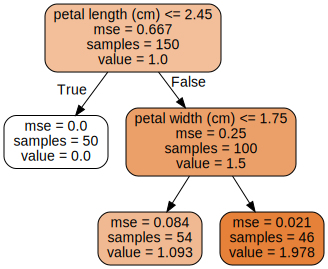

In [0]:
export_graphviz(
        tree_reg,
        out_file=os.path.join("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join("iris_tree.dot"))

Esto ha sido todo con este capitulo, se invita al lector a ver la página de [sklearn](https://scikit-learn.org/stable/index.html). Es muy completa y amigable. Con ella podrás complementar lo que has aprendido acá.